<a href="https://colab.research.google.com/github/galang006/EDA_Trending-Youtube-Canada/blob/main/FP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [309]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

custSeg = pd.read_csv('/content/drive/MyDrive/Datasets/customer_segmentation.csv', encoding = 'unicode_escape')

In [310]:
custSeg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Data Pre-processing**

In [311]:
custSeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [312]:
custSeg.dropna(inplace = True)
custSeg.isna().sum()
custSeg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [313]:
custSeg['Total_Amount'] = custSeg['Quantity']*custSeg['UnitPrice']

**RFM analysis**

In [314]:
m = custSeg.groupby('CustomerID')['Total_Amount'].sum()
m = pd.DataFrame(m).reset_index()
m.head()

,CustomerID,Total_Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [315]:
f = custSeg.groupby('CustomerID')['InvoiceNo'].count()
f =f.reset_index()
f.columns = ['CustomerID','Frequency']
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [316]:
custSeg['InvoiceDate'] = pd.to_datetime(custSeg['InvoiceDate'], format='%m/%d/%Y %H:%M')
last_day = max(custSeg['InvoiceDate'])

In [317]:
custSeg['difference'] = last_day - custSeg['InvoiceDate']
custSeg.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [318]:
def get_days(x):
    y = str(x).split()[0]
    return int(y)
custSeg['difference'] = custSeg['difference'].apply(get_days)

In [319]:
r = custSeg.groupby('CustomerID')['difference'].min()
r = r.reset_index()
r.columns = ['CustomerID','Recency']
r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [320]:
grouped_df = pd.merge(m, f, on = 'CustomerID',how = 'inner')
RFM_df = pd.merge(grouped_df, r, on ='CustomerID', how = 'inner')
RFM_df.columns = ['CustomerID','Monetary','Frequency','Recency']
RFM_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


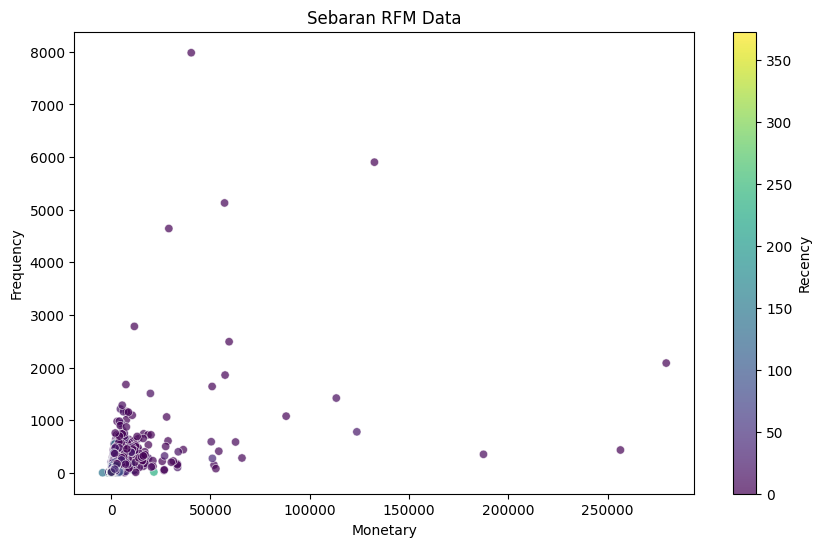

In [322]:
# Data
customer_ids = RFM_df['CustomerID']
monetary_values = RFM_df['Monetary']
frequency_values = RFM_df['Frequency']
recency_values = RFM_df['Recency']

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(monetary_values, frequency_values, c=recency_values, cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)

# Memberi label sumbu dan judul
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Sebaran RFM Data')

# Menambahkan colorbar untuk Recency
colorbar = plt.colorbar()
colorbar.set_label('Recency')

# Menampilkan plot
plt.show()

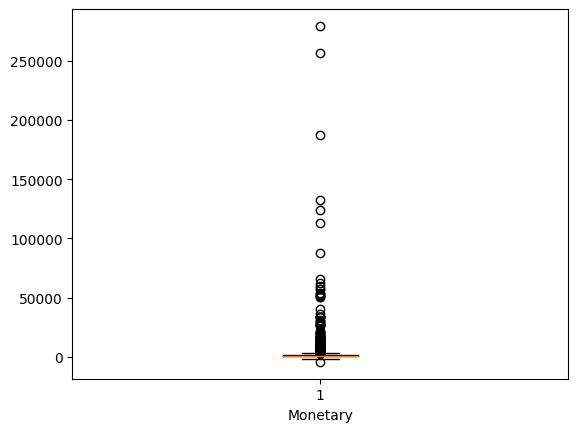

In [323]:
plt.boxplot(RFM_df['Monetary'])
plt.xlabel('Monetary')
plt.show()

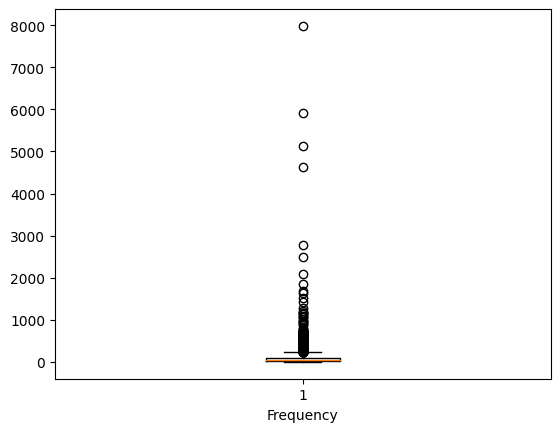

In [324]:
plt.boxplot(RFM_df['Frequency'])
plt.xlabel('Frequency')
plt.show()

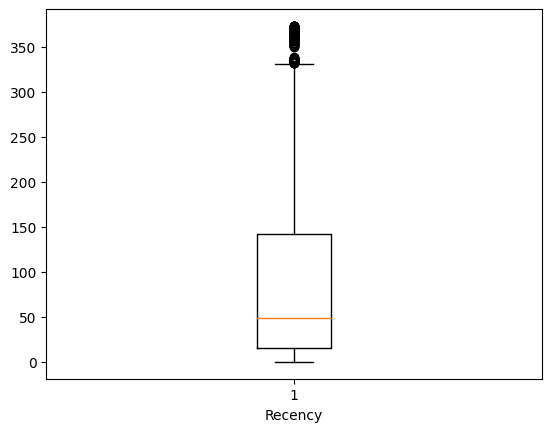

In [325]:
plt.boxplot(RFM_df['Recency'])
plt.xlabel('Recency')
plt.show()

**Drop Outliers**

In [340]:
outlier_vars = ['Monetary','Recency','Frequency']
for column in outlier_vars:

    lower_quartile = RFM_df[column].quantile(0.25)
    upper_quartile = RFM_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended

    outliers = RFM_df[(RFM_df[column] < min_border) | (RFM_df[column] > max_border)].index
    print(f"{len(outliers)} outliers terdeteksi di kolom {column}")

    RFM_df.drop(outliers, inplace = True)

0 outliers terdeteksi di kolom Monetary
0 outliers terdeteksi di kolom Recency
0 outliers terdeteksi di kolom Frequency


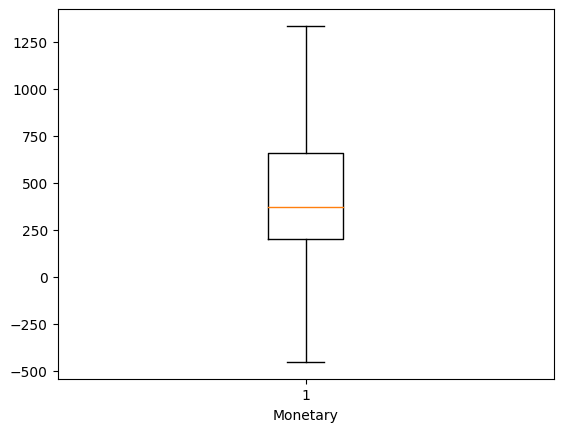

In [341]:
plt.boxplot(RFM_df['Monetary'])
plt.xlabel('Monetary')
plt.show()

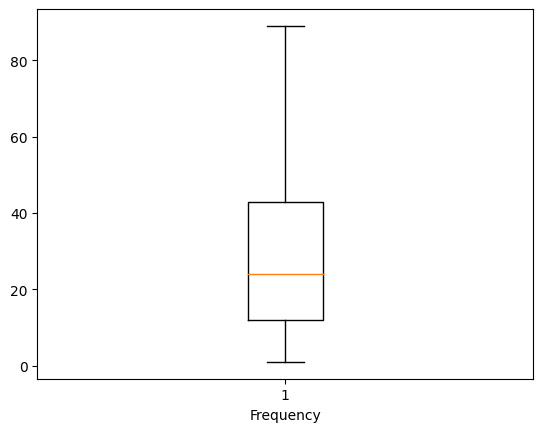

In [342]:
plt.boxplot(RFM_df['Frequency'])
plt.xlabel('Frequency')
plt.show()

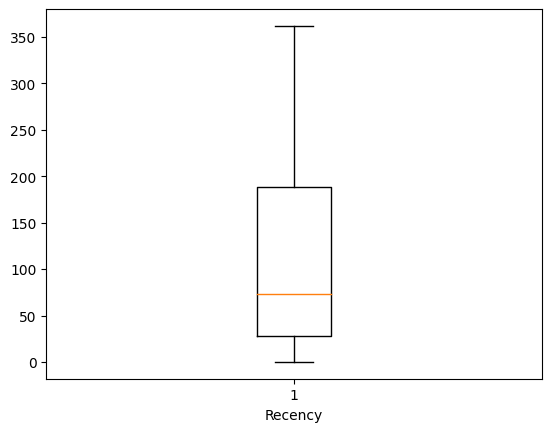

In [343]:
plt.boxplot(RFM_df['Recency'])
plt.xlabel('Recency')
plt.show()

**Standardisation**

In [355]:
scaled_df = RFM_df[['Monetary','Frequency','Recency']]
scale_standardisation = StandardScaler()
rfm_df_scaled = scale_standardisation.fit_transform(scaled_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetary','frequency','recency']
rfm_df_scaled.head()

,monetary,frequency,recency
0,-1.412440,-1.266701,2.092800
1,-0.393935,-0.567558,1.934981
2,-1.141366,-1.173482,0.889430
3,1.875163,1.343433,1.165613
4,-0.013214,-0.753996,0.988066


**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

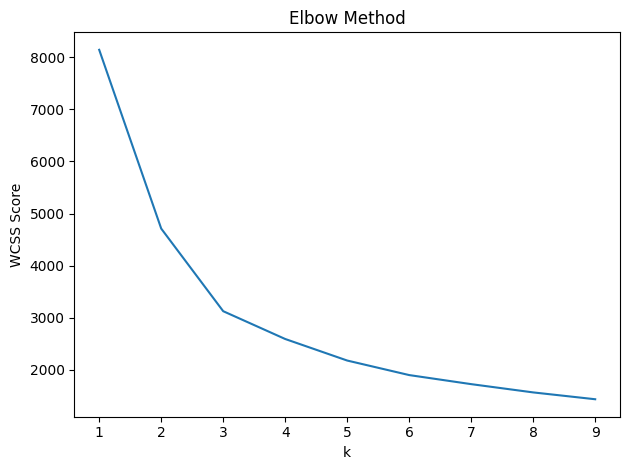

In [345]:
k_values = list(range(1,10))
wcss_list = []
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_transform(rfm_df_scaled)
    wcss_list.append(kmeans.inertia_)
plt.plot(k_values,wcss_list)
plt.xlabel("k")
plt.ylabel("WCSS Score")
plt.title("Elbow Method")
plt.tight_layout()
plt.show()

**K-Means Clustering**

In [356]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

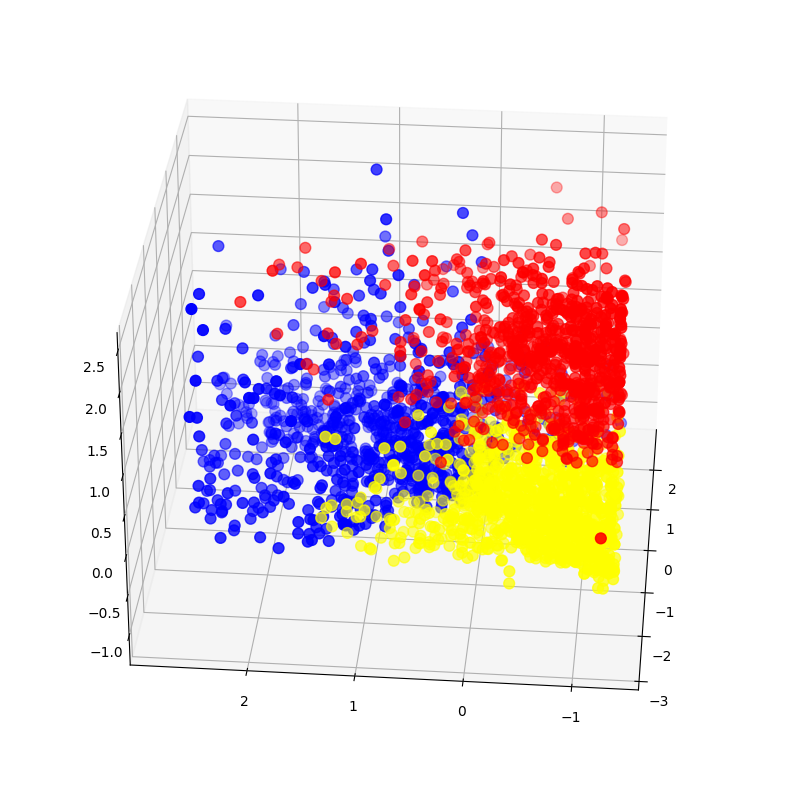

In [357]:
clusters = kmeans.labels_
RFM = rfm_df_scaled
RFM['labels'] = clusters
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["monetary"][RFM.labels == 0], RFM["frequency"][RFM.labels == 0], RFM["recency"][RFM.labels == 0], c='blue', s=60)
ax.scatter(RFM["monetary"][RFM.labels == 1], RFM["frequency"][RFM.labels == 1], RFM["recency"][RFM.labels == 1], c='red', s=60)
ax.scatter(RFM["monetary"][RFM.labels == 2], RFM["frequency"][RFM.labels == 2], RFM["recency"][RFM.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()

**Evaluasi Model dengan Davies-Bouldin Index**

In [360]:
cluster_labels = kmeans.labels_
dbi_score = davies_bouldin_score(rfm_df_scaled, cluster_labels)

print(f'Davies-Bouldin Index: {dbi_score}')

Davies-Bouldin Index: 0.7521943257555893


In [361]:
RFM_df['Clusters'] = kmeans.labels_
analysis = RFM_df.groupby('Clusters').agg({
    'Recency': ['mean', 'max', 'min'],
    'Frequency': ['mean', 'max', 'min'],
    'Monetary': ['mean', 'max', 'min', 'count']
})

analysis.head()

Recency            Frequency            Monetary           \
                mean  max  min       mean max min        mean      max   
Clusters                                                                 
0          61.416076  352    0  53.177305  89   2  823.815651  1336.10   
1         250.315245  362  142  17.413437  77   1  280.878915  1308.48   
2          55.313528  157    0  18.939671  61   1  314.659536   924.60   

                        
             min count  
Clusters                
0         163.07   846  
1        -451.42   774  
2        -134.80  1094